# Question D11

*Question*: Considering the ML-enabled system projects in which you participated, how agile do you rate your development?

*Answer Type*: Likert Option

*Options*: [Totally traditional, Mostly traditional, Balanced between agile and traditional, Mostly agile, Totally agile, I don't know]

### Necessary Libraries

In [1]:
import pandas as pd
from utils.basic import rename_values
from utils.dataframe import DataframeUtils
from utils.plot import PlotUtils
from utils.bootstrapping import BootstrappingUtils

### Dataframe Init

In [2]:
dataframe_obj = DataframeUtils('./data/main_data.csv', ';', './data/unused_columns.txt', './data/formatted_columns.txt')
# the index is not important, but when we internally format df we need to reset index
dataframe_obj.df = dataframe_obj.df.reset_index(drop=True)

In [3]:
# For PROFES, we discarded suspended submissions (e.g., remove those who didn't complete the survey).
dataframe_obj.df.drop(dataframe_obj.df[dataframe_obj.df['Status'] == 'Suspended (22)'].index, inplace = True)

### Basic Analysis

In [4]:
dataframe_obj.df['D11_Agile_Development'].head()

0                       Totally traditional
1    Balanced between agile and traditional
2    Balanced between agile and traditional
3                             Totally agile
4    Balanced between agile and traditional
Name: D11_Agile_Development, dtype: object

In [5]:
# cleaning data
dataframe_obj.remove_value_from_df('0','D11_Agile_Development')
dataframe_obj.remove_value_from_df("I don't know",'D11_Agile_Development') # I don't know option is not important

In [6]:
indexes = list(dataframe_obj.df['D11_Agile_Development'].value_counts().index)
values = list(dataframe_obj.df['D11_Agile_Development'].value_counts())

In [7]:
indexes

['Mostly agile',
 'Balanced between agile and traditional',
 'Totally traditional',
 'Totally agile',
 'Mostly traditional']

In [8]:
# format order to show on likert
order = [2, 3, 1, 0, 4]
indexes = [indexes[i] for i in order]
values = [values[i] for i in order]

In [9]:
# normalize values - ensuring that the sum don't overflow 100
sum_values = sum(values)
normalized_values = [(float(v)/sum_values)* 100 for v in values]

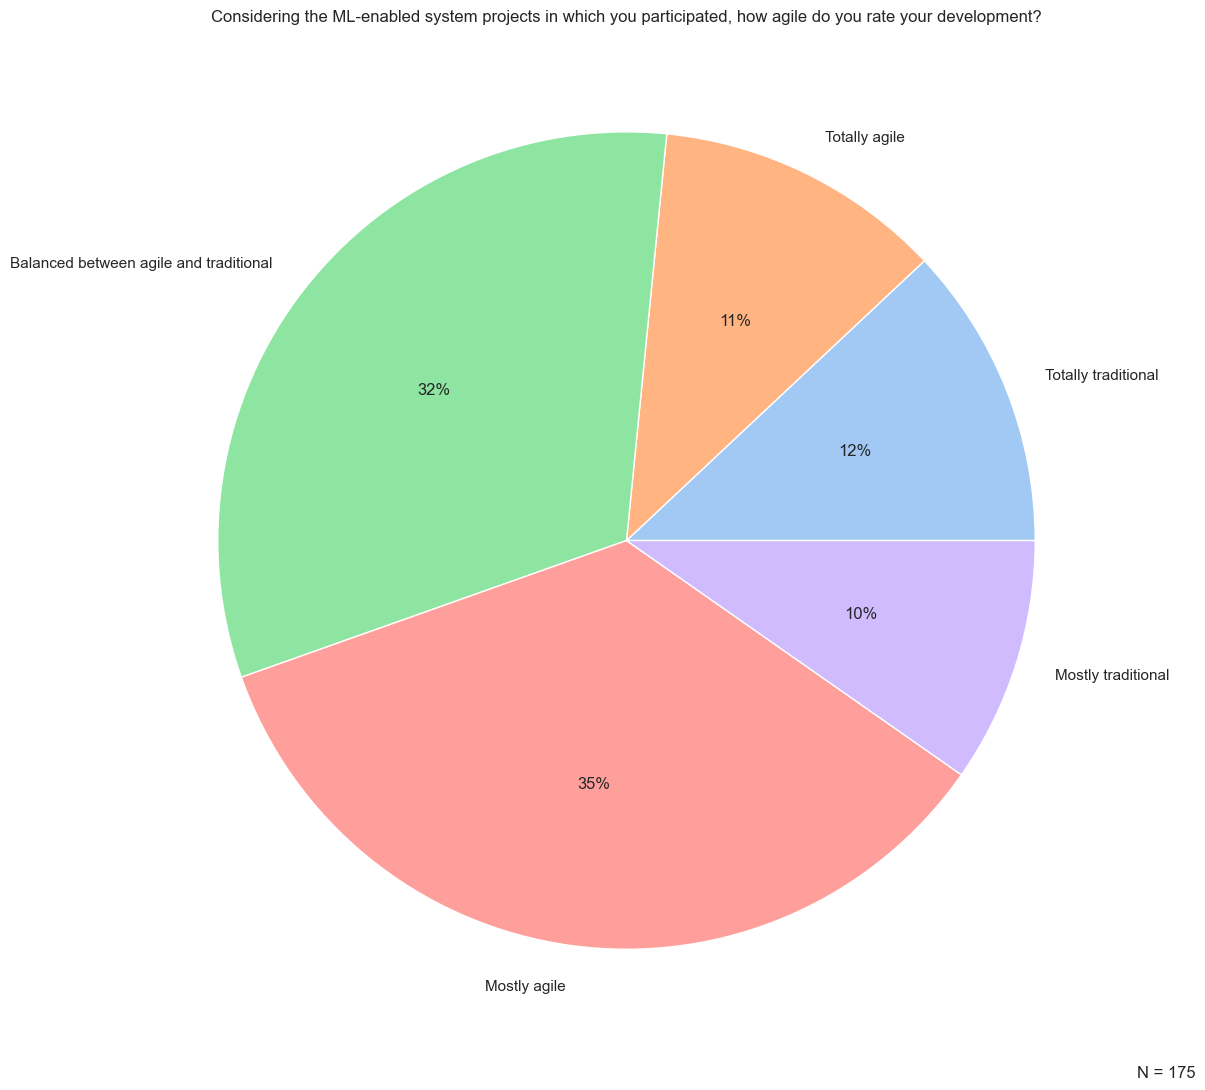

In [10]:
# piechart
d11_plot = PlotUtils(pd.DataFrame(
    data={'Agility': indexes, 'Answers': normalized_values}
))

# compute total of answer considered in this question
total_answers = "N = " + str(len(dataframe_obj.df['D11_Agile_Development']))
total_answers_int = len(dataframe_obj.df['D11_Agile_Development'])

d11_plot.pie_chart(values_column="Answers", labels_column="Agility", 
                  title="Considering the ML-enabled system projects in which you participated, how agile do you rate your development?",
                  total_answers=total_answers)

In [11]:
# likert
d11_plot = PlotUtils(pd.DataFrame(
    data={'Agility': list(dataframe_obj.df['D11_Agile_Development'])}
))

In [12]:
d11_plot.likert(indexes, use_percentage=True, bar_label=True)

TypeError: DataFrame.set_axis() got an unexpected keyword argument 'inplace'

In [ ]:
d11_plot.likert(indexes, use_percentage=False, bar_label=True)

### Bootstrapping Analysis

In [13]:
valid_options_list = list(dataframe_obj.df['D11_Agile_Development'].unique())
valid_answers_list = list(dataframe_obj.df['D11_Agile_Development'])

In [14]:
replacements = 1000
population_sample_size = total_answers_int # equals n - total valid answers

bootstrapping_obj = BootstrappingUtils(valid_answers_list, valid_options_list, replacements, population_sample_size, 95)

In [15]:
bootstrapped_dict_data = bootstrapping_obj.bootstrapping('single')

In [16]:
normalized_bootstrapped_dict_data = {}
for option in bootstrapped_dict_data:
    normalized_value = sum(bootstrapped_dict_data[option]['population']) / len(bootstrapped_dict_data[option]['population'])
    normalized_bootstrapped_dict_data[option] = normalized_value

In [17]:
labels = list(normalized_bootstrapped_dict_data.keys())
values = list(normalized_bootstrapped_dict_data.values())

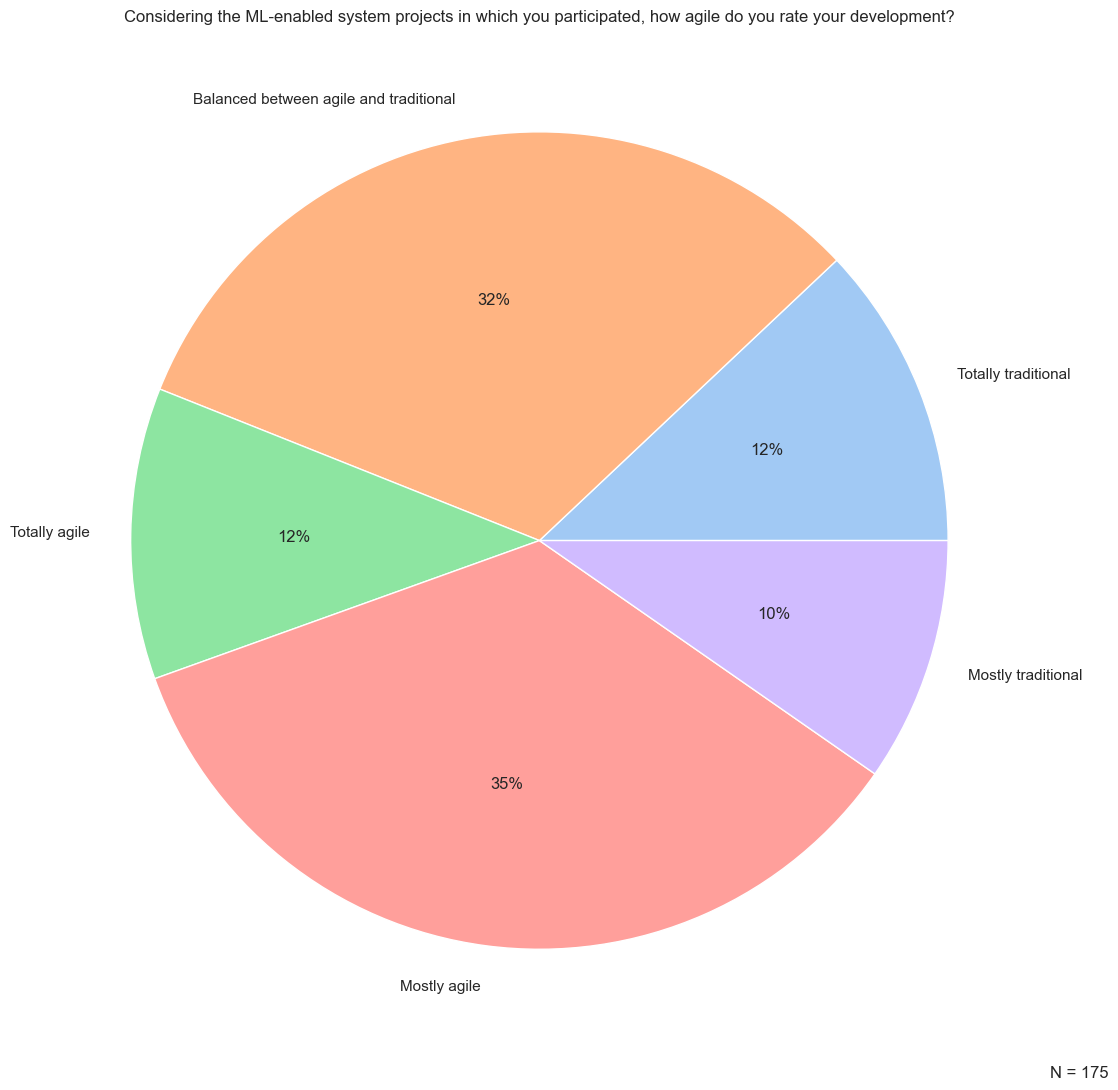

In [18]:
# pie chart
d11_plot = PlotUtils(pd.DataFrame(
    data={'Agility': labels, 'Answers': values}
))

# compute total of answer considered in this question
total_answers = "N = " + str(len(dataframe_obj.df['D11_Agile_Development']))

d11_plot.pie_chart(values_column="Answers", labels_column="Agility", 
                  title="Considering the ML-enabled system projects in which you participated, how agile do you rate your development?",
                  total_answers=total_answers)

In [19]:
# logical order to likert plot
order = [0, 4, 1, 3, 2]
labels = [labels[i] for i in order]
values = [values[i] for i in order]

In [20]:
# likert data
population_agile_development = []
for label, value in zip(labels, values):
    population_agile_development += [label for _ in range(round(value * 100))]

In [21]:
# liker plot
d11_plot = PlotUtils(pd.DataFrame(
    data={'Agility': population_agile_development}
))

In [22]:
d11_plot.likert(labels, use_percentage=True, bar_label=True)

TypeError: DataFrame.set_axis() got an unexpected keyword argument 'inplace'

In [23]:
d11_plot.likert(labels, use_percentage=False, bar_label=True)

TypeError: DataFrame.set_axis() got an unexpected keyword argument 'inplace'

In [24]:
# confidence for each option
print("Option : (Lower Value, Mean, Upper Value)")
for idx in bootstrapped_dict_data:
    print(idx + ':' + str(bootstrapped_dict_data[idx]['confidence']))

print(20*"---")

Option : (Lower Value, Mean, Upper Value)
Totally traditional:(0.11843427071286652, 0.12032000000000001, 0.1222057292871335)
Balanced between agile and traditional:(0.3169802953683593, 0.3192571428571429, 0.3215339903459265)
Totally agile:(0.11381169899331008, 0.11530285714285715, 0.11679401529240423)
Mostly agile:(0.3461051359432124, 0.3484114285714285, 0.35071772119964456)
Mostly traditional:(0.09543597159299487, 0.09670857142857142, 0.09798117126414797)
------------------------------------------------------------


In [25]:
# confidence for each option
print("Option: (Lower Value, Mean, Upper Value)")
for idx in bootstrapped_dict_data:
    print(idx + ':: P = ' + str(round((bootstrapped_dict_data[idx]['confidence'][1] * 100), 3)) + " [" + str(round((bootstrapped_dict_data[idx]['confidence'][0] * 100), 3)) + ", " + str(round((bootstrapped_dict_data[idx]['confidence'][2] * 100), 3)) + "]")

Option: (Lower Value, Mean, Upper Value)
Totally traditional:: P = 12.032 [11.843, 12.221]
Balanced between agile and traditional:: P = 31.926 [31.698, 32.153]
Totally agile:: P = 11.53 [11.381, 11.679]
Mostly agile:: P = 34.841 [34.611, 35.072]
Mostly traditional:: P = 9.671 [9.544, 9.798]
